# Comparing ML Classifiers: Model Performance & Decision Boundaries
# Problem Statement

The objective of this study is to comprehensively evaluate and compare the performance of various machine learning classifiers on synthetic datasets using a range of evaluation metrics.

**Details:**

1. **Data Generation:**
   - Generate synthetic datasets with varying complexities using methods such as `make_classification`, `make_moons`, and `make_circles`.
   - Introduce random noise (normally distributed) to simulate real-world data scenarios.

2. **Classifier Selection:**
   - Employ a diverse array of classifiers including **K-Nearest Neighbors**, **Support Vector Machines** (with linear and RBF kernels), **Gaussian Processes**, **Decision Trees**, **Random Forests**, **Neural Networks**, **AdaBoost**, **Naive Bayes**, **Quadratic Discriminant Analysis**, **XGBoost**, and **LightGBM**.

3. **Evaluation Metrics:**
   - Utilize standard evaluation metrics such as **accuracy**, **precision**, **recall**, **$F1$-score**, and potentially **ROC-AUC** to assess the performance of classifiers.
   - Visualize decision boundaries and classifier predictions on datasets to gain insights into their performance across different data distributions.

4. **Comparison and Analysis:**
   - Compare the performance of classifiers by analyzing their decision boundary effectiveness across synthetic datasets with varying complexities and levels of noise.

5. **Optimization and Insights:**
   - Optimize the hyperparameters of promising classifiers to enhance performance metrics.
   - Gain insights into the strengths and weaknesses of each classifier based on their performance across different datasets and noise levels.

**Deliverables:**

- A detailed comparative performance report showcasing the performance of each classifier on synthetic datasets.
- Visualizations of decision boundaries and classifier predictions to aid in understanding their behavior.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb


In [2]:
# Generate synthetic dataset using make_classification
X, y = make_classification(
    n_samples=300,                # Number of samples
    n_features=2,                 # Number of features
    n_redundant=0,                # Number of redundant features (none here)
    n_informative=2,              # Number of informative features
    random_state=1,               # Random state for reproducibility
    n_clusters_per_class=1        # Number of clusters per class
)

# Add random normally distributed noise to dataset
rng = np.random.RandomState(42)   # Random state for noise generation
X += rng.normal(size=X.shape)     # Add noise to features
classification_ds = (X, y)        # Store dataset as a tuple

# Define datasets including moons, circles, and the generated classification dataset
datasets = [
    make_moons(noise=0.5, random_state=42),       # Generate moon-shaped data
    # Generate circular data
    make_circles(noise=0.5, factor=0.6, random_state=42),
    # Use previously generated classification dataset
    classification_ds
]


In [3]:
# Classifier names and instances
names = [
    "K-Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
    "Decision Tree", "Random Forest", "Neural Network", "AdaBoost",
    "Naive Bayes", "QDA", "XGBoost", "LightGBM"
]

# List of classifiers with commented parameters
classifiers = [
    KNeighborsClassifier(
        n_neighbors=3,            # Number of neighbors to consider
        weights='uniform',        # Weight function used in prediction
        algorithm='auto',         # Algorithm used to compute the nearest neighbors
        leaf_size=30,             # Leaf size passed to BallTree or KDTree
        p=2,                      # Power parameter for Minkowski metric
        metric='minkowski',       # Distance metric to use
        n_jobs=None               # Number of parallel jobs to run for neighbors search
    ),
    SVC(
        C=0.025,                  # Regularization parameter
        kernel='linear',          # Kernel type to be used in the algorithm
        degree=3,                 # Degree of the polynomial kernel function
        gamma='scale',            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        coef0=0.0,                # Independent term in kernel function
        shrinking=True,           # Whether to use the shrinking heuristic
        probability=False,        # Whether to enable probability estimates
        tol=1e-3,                 # Tolerance for stopping criteria
        cache_size=200,           # Size of the kernel cache (in MB)
        class_weight=None,        # Weights associated with classes
        verbose=False,            # Enable verbose output
        max_iter=-1,              # Hard limit on iterations within solver
        decision_function_shape='ovr',  # Decision function shape
        break_ties=False,         # Whether to break ties in 'predict' method
        random_state=None         # Seed used by the random number generator
    ),
    SVC(
        C=1,                      # Regularization parameter
        kernel='rbf',             # Kernel type to be used in the algorithm
        gamma=2,                  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        coef0=0.0,                # Independent term in kernel function
        shrinking=True,           # Whether to use the shrinking heuristic
        probability=False,        # Whether to enable probability estimates
        tol=1e-3,                 # Tolerance for stopping criteria
        cache_size=200,           # Size of the kernel cache (in MB)
        class_weight=None,        # Weights associated with classes
        verbose=False,            # Enable verbose output
        max_iter=-1,              # Hard limit on iterations within solver
        decision_function_shape='ovr',  # Decision function shape
        break_ties=False,         # Whether to break ties in 'predict' method
        random_state=None         # Seed used by the random number generator
    ),
    GaussianProcessClassifier(
        kernel=1.0 * RBF(1.0),   # Kernel specifying the covariance function
        optimizer='fmin_l_bfgs_b',  # Optimizer to use when fitting the Gaussian process
        n_restarts_optimizer=0,  # Number of restarts for finding the optimum
        max_iter_predict=100,    # Maximum number of iterations when predicting
        warm_start=False,        # Whether to reuse the last call results
        copy_X_train=True,       # Whether to copy X_train in fit methods
        random_state=None        # Seed used by the random number generator
    ),
    DecisionTreeClassifier(
        criterion='gini',        # Function to measure the quality of a split
        splitter='best',         # Strategy to choose the split at each node
        max_depth=5,             # Maximum depth of the tree
        min_samples_split=2,     # Minimum number of samples required to split an internal node
        min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
        # Minimum weighted fraction of the sum total of weights
        min_weight_fraction_leaf=0.0,
        max_features=None,       # Number of features to consider when looking for the best split
        random_state=None,       # Seed used by the random number generator
        max_leaf_nodes=None,     # Grow a tree with max_leaf_nodes in best-first fashion
        # A node will be split if this split induces a decrease of the impurity
        min_impurity_decrease=0.0,
        class_weight=None,       # Weights associated with classes
        ccp_alpha=0.0            # Complexity parameter used for Minimal Cost-Complexity Pruning
    ),
    RandomForestClassifier(
        n_estimators=10,         # Number of trees in the forest
        criterion='gini',        # Function to measure the quality of a split
        max_depth=5,             # Maximum depth of the tree
        min_samples_split=2,     # Minimum number of samples required to split an internal node
        min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
        # Minimum weighted fraction of the sum total of weights
        min_weight_fraction_leaf=0.0,
        max_features=1,          # Number of features to consider when looking for the best split
        max_leaf_nodes=None,     # Grow a tree with max_leaf_nodes in best-first fashion
        # A node will be split if this split induces a decrease of the impurity
        min_impurity_decrease=0.0,
        bootstrap=True,          # Whether bootstrap samples are used when building trees
        # Whether to use out-of-bag samples to estimate the generalization error
        oob_score=False,
        n_jobs=None,             # Number of jobs to run in parallel for both fit and predict
        random_state=None,       # Seed used by the random number generator
        verbose=0,               # Control the verbosity when fitting and predicting
        warm_start=False,        # When set to True, reuse the solution of the previous call to fit
        class_weight=None,       # Weights associated with classes
        ccp_alpha=0.0            # Complexity parameter used for Minimal Cost-Complexity Pruning
    ),
    MLPClassifier(
        hidden_layer_sizes=(100,),  # Sizes of the hidden layers
        activation='relu',       # Activation function for the hidden layer
        solver='adam',           # Solver for weight optimization
        alpha=1,                 # L2 penalty (regularization term) parameter
        batch_size='auto',       # Size of minibatches for stochastic optimizers
        learning_rate='constant',  # Learning rate schedule for weight updates
        learning_rate_init=0.001,  # Initial learning rate used
        power_t=0.5,             # Exponent for inverse scaling learning rate
        max_iter=1000,           # Maximum number of iterations
        shuffle=True,            # Whether to shuffle samples in each iteration
        random_state=None,       # Seed used by the random number generator
        tol=1e-4,                # Tolerance for optimization
        verbose=False,           # Whether to print progress messages to stdout
        warm_start=False,        # When set to True, reuse the solution of the previous call to fit
        momentum=0.9,            # Momentum for gradient descent update
        nesterovs_momentum=True,  # Whether to use Nesterov's momentum
        # Whether to use early stopping to terminate training when validation score doesn't improve
        early_stopping=False,
        # Fraction of training data to set aside as validation set for early stopping
        validation_fraction=0.1,
        # Exponential decay rate for estimates of first moment vector in adam
        beta_1=0.9,
        # Exponential decay rate for estimates of second moment vector in adam
        beta_2=0.999,
        epsilon=1e-8,            # Value for numerical stability in adam
        n_iter_no_change=10,     # Maximum number of epochs to not meet tol improvement
        max_fun=15000            # Maximum number of loss function evaluations
    ),
    AdaBoostClassifier(
        n_estimators=50,         # Number of boosting stages
        learning_rate=1.0,       # Learning rate for each estimator
        algorithm='SAMME.R',     # Boosting algorithm to use
        random_state=None        # Seed used by the random number generator
    ),
    GaussianNB(
        priors=None,             # Prior probabilities of the classes
        # Portion of the largest variance of all features added to variances for calculation stability
        var_smoothing=1e-9
    ),
    QuadraticDiscriminantAnalysis(
        priors=None,             # Prior probabilities of the classes
        reg_param=0.0,           # Regularization parameter
        store_covariance=False,  # Whether to store covariance estimates
        tol=1e-4                 # Tolerance for singular values decomposition of covariance estimates
    ),
    xgb.XGBClassifier(
        use_label_encoder=False,  # Whether to use label encoder for target labels
        eval_metric='logloss',    # Evaluation metric for validation data
        objective='binary:logistic',  # Learning task and objective function
        booster='gbtree',         # Booster type
        tree_method='auto',       # Tree construction method
        n_estimators=100,         # Number of boosting rounds
        learning_rate=0.1,        # Step size shrinkage used in update to prevent overfitting
        max_depth=6,              # Maximum depth of a tree
        # Minimum sum of instance weight (hessian) needed in a child
        min_child_weight=1,
        subsample=1,              # Subsample ratio of the training instance
        colsample_bytree=1,       # Subsample ratio of columns when constructing each tree
        colsample_bylevel=1,      # Subsample ratio of columns for each level
        colsample_bynode=1,       # Subsample ratio of columns for each split
        reg_alpha=0,              # L1 regularization term on weights
        reg_lambda=1,             # L2 regularization term on weights
        scale_pos_weight=1,       # Balancing of positive and negative weights
        base_score=0.5,           # The initial prediction score of all instances
        random_state=0,           # Seed used by the random number generator
        missing=np.nan           # Value in the data which needs to be present as a missing value
    ),
    lgb.LGBMClassifier(
        n_estimators=100,        # Number of boosting rounds
        max_depth=15,             # Maximum depth of tree
        num_leaves=23,            # Maximum number of leaves in one tree
        learning_rate=0.1,        # Step size shrinkage used in update to prevent overfitting
        subsample_for_bin=200000,  # Number of samples to construct bins
        class_weight=None,        # Weights associated with classes
        min_split_gain=0.0,       # Minimum loss reduction required to make a further partition
        # Minimum sum of instance weight (hessian) needed in a child
        min_child_weight=1e-3,
        # Minimum number of data needed in a child (leaf)
        min_child_samples=30,
        subsample=1.0,            # Subsample ratio of the training instance
        subsample_freq=0,         # Frequency of subsample, <=0 means no enable
        colsample_bytree=1.0,     # Subsample ratio of columns when constructing each tree
        reg_alpha=0.0,            # L1 regularization term on weights
        reg_lambda=0.0,           # L2 regularization term on weights
        random_state=None,        # Seed used by the random number generator
        n_jobs=-1,                # Number of parallel threads
        silent=True,              # Whether to print messages while running boosting
        # The type of feature importance to be filled into feature_importances_
        importance_type='gain',
        boosting_type='gbdt',     # Type of boosting
        objective='binary',       # Learning task and objective function
        metric='binary_logloss',  # Evaluation metric for validation data
        is_unbalance=False,       # Whether to use unbalanced data
        colsample_bynode=1.0,     # Subsample ratio of columns for each node
        verbose=-1                # Verbosity of output
    )
]


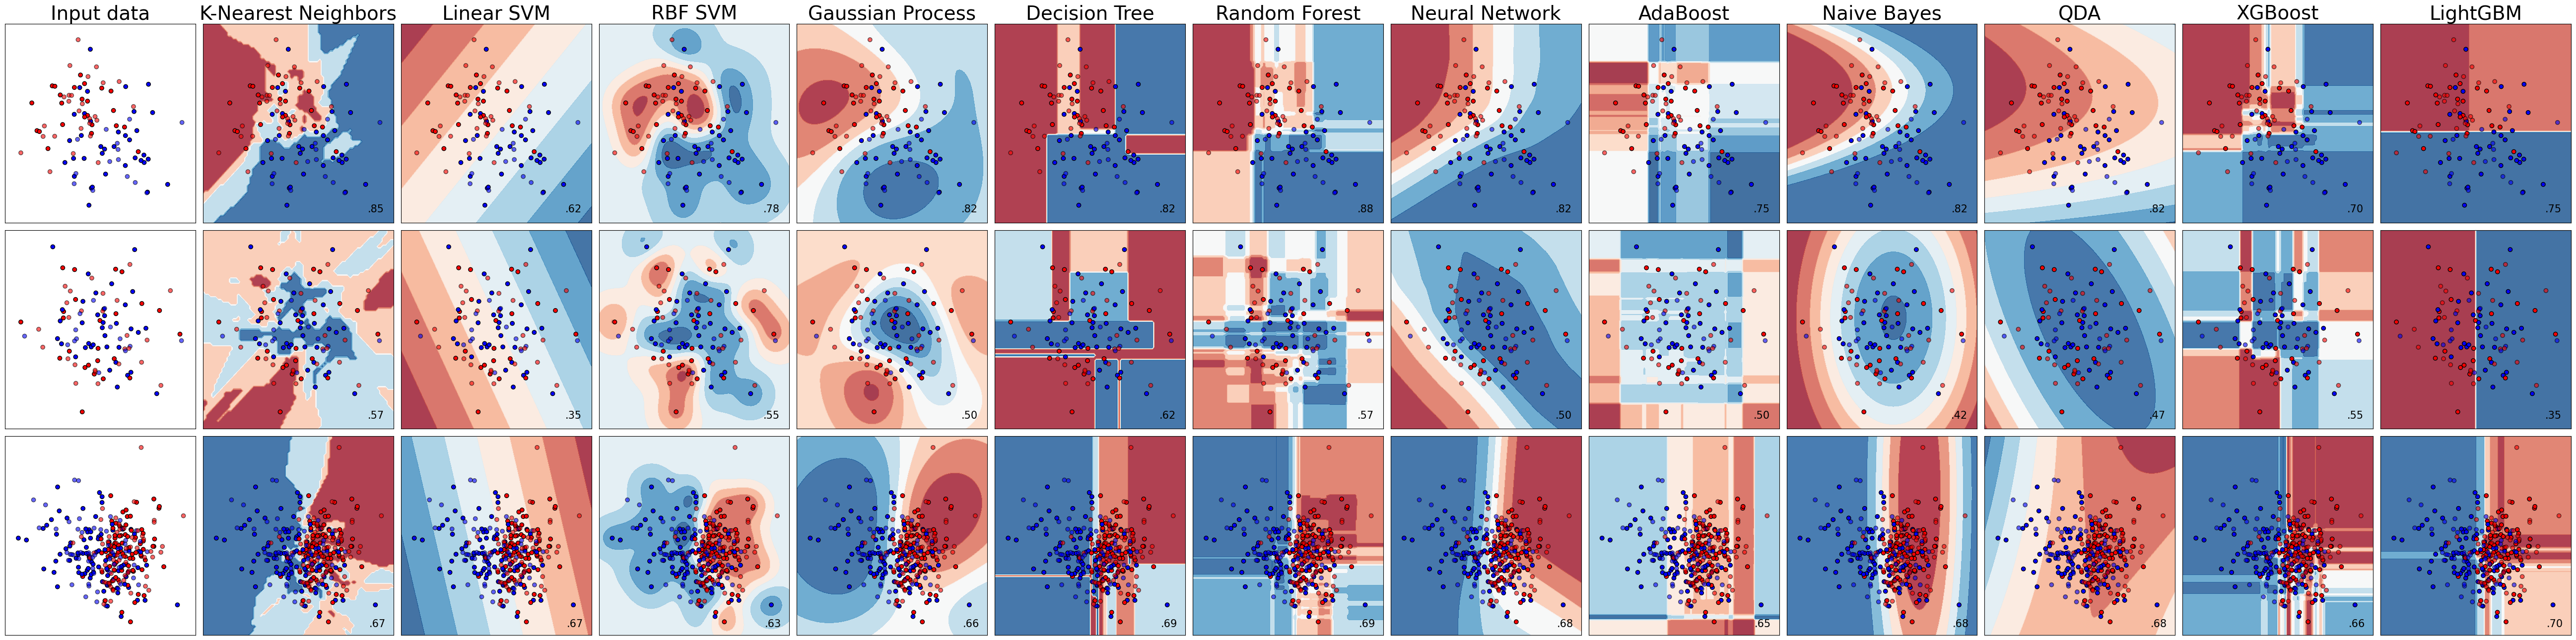

In [4]:
# Plot setup
figure = plt.figure(figsize=(52, 13))   # Create a figure with specified size
i = 1                                  # Initialize subplot index
h = 0.08                            # Mesh step size for plotting decision boundaries

# Iterate over datasets
for idx, data in enumerate(datasets):
    X, y = data
    X = StandardScaler().fit_transform(X)   # Standardize the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)  # Split data into training and testing sets

    # Define mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    # Create subplot for each dataset and classifier
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if idx == 0:
        ax.set_title("Input data", fontsize=28)   # Set title for the first subplot
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors='k')   # Plot training data
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6, edgecolors='k')   # Plot testing data with transparency
    ax.set_xlim(xx.min(), xx.max())   # Set x-axis limits
    ax.set_ylim(yy.min(), yy.max())   # Set y-axis limits
    ax.set_xticks(())   # Remove x-axis ticks
    ax.set_yticks(())   # Remove y-axis ticks
    i += 1   # Increment subplot index

    # Iterate over classifiers
    for name, clf in zip(names, classifiers):
        # Create subplot for each classifier
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)   # Fit classifier to training data
        # Calculate accuracy score on test data
        score = clf.score(X_test, y_test)

        # Plot decision boundaries
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # Fill contour plot with decision boundaries
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot training and testing data points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                   cmap=cm_bright, edgecolors='k')
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                   cmap=cm_bright, edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())   # Set x-axis limits
        ax.set_ylim(yy.min(), yy.max())   # Set y-axis limits
        ax.set_xticks(())   # Remove x-axis ticks
        ax.set_yticks(())   # Remove y-axis ticks

        if idx == 0:
            ax.set_title(name, fontsize=28)
        ax.text(xx.max() - 0.3, yy.min() + 0.3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')   # Display accuracy score as text
        i += 1   # Increment subplot index

plt.tight_layout()   # Adjust subplot layout
plt.show()   # Display the plot


### Detailed Performance Report of Each Classifier on the Generated Classification Dataset (Third Plot)

In [5]:
#generated classification dataset - third plot
X, y = datasets[2]
X = StandardScaler().fit_transform(X)   # Standardize the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # Split data into training and testing sets

Classifier: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        62
           1       0.66      0.66      0.66        58

    accuracy                           0.67       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.67      0.67      0.67       120



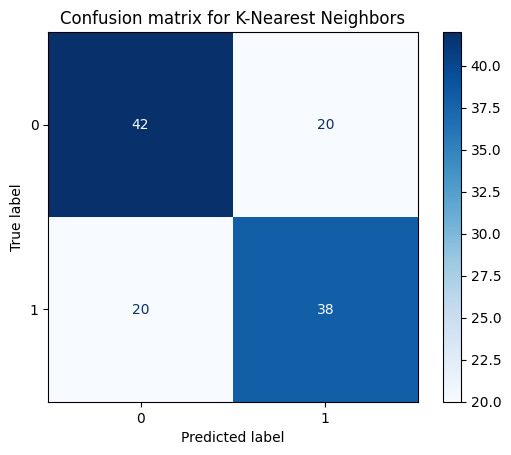

----------------------------------------------------------------------------------------------------


Classifier: Linear SVM
              precision    recall  f1-score   support

           0       0.66      0.73      0.69        62
           1       0.67      0.60      0.64        58

    accuracy                           0.67       120
   macro avg       0.67      0.66      0.66       120
weighted avg       0.67      0.67      0.67       120



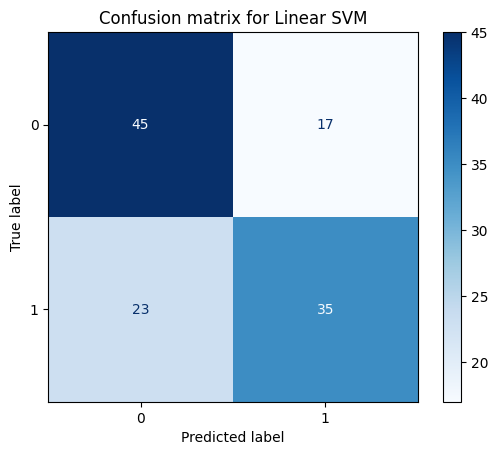

----------------------------------------------------------------------------------------------------


Classifier: RBF SVM
              precision    recall  f1-score   support

           0       0.66      0.61      0.63        62
           1       0.61      0.66      0.63        58

    accuracy                           0.63       120
   macro avg       0.63      0.63      0.63       120
weighted avg       0.63      0.63      0.63       120



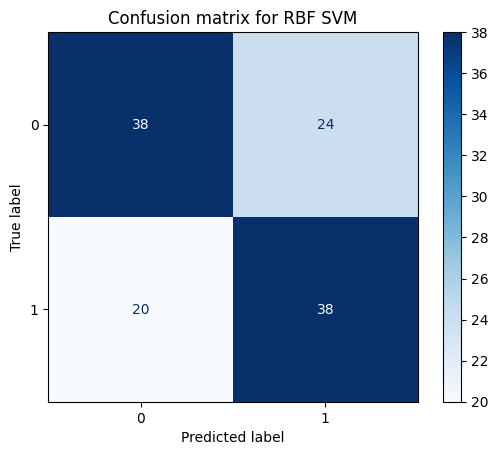

----------------------------------------------------------------------------------------------------


Classifier: Gaussian Process
              precision    recall  f1-score   support

           0       0.66      0.69      0.68        62
           1       0.65      0.62      0.64        58

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.66      0.66       120



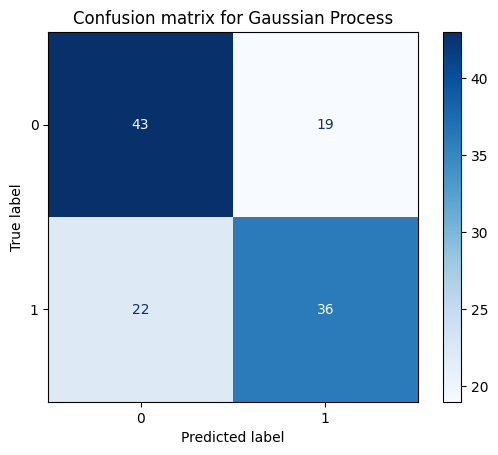

----------------------------------------------------------------------------------------------------


Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        62
           1       0.69      0.66      0.67        58

    accuracy                           0.69       120
   macro avg       0.69      0.69      0.69       120
weighted avg       0.69      0.69      0.69       120



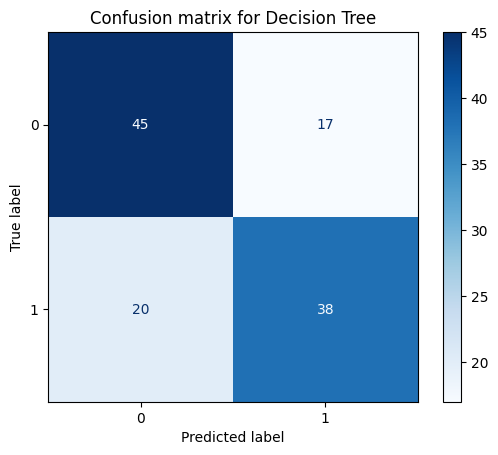

----------------------------------------------------------------------------------------------------


Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        62
           1       0.70      0.66      0.68        58

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120



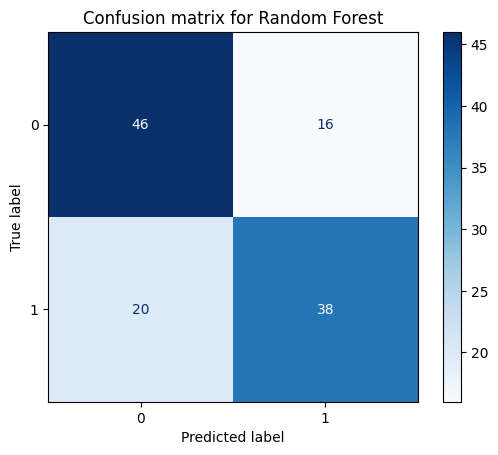

----------------------------------------------------------------------------------------------------


Classifier: Neural Network
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        62
           1       0.67      0.64      0.65        58

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.67      0.68      0.67       120



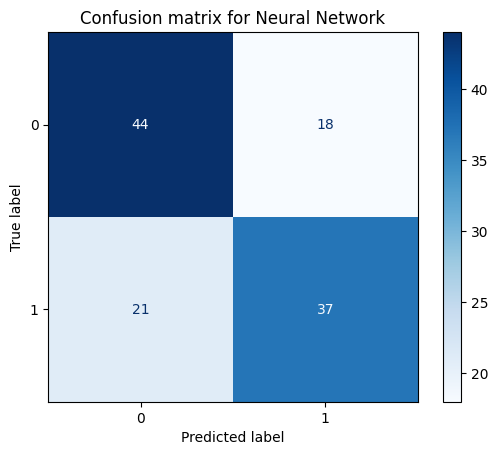

----------------------------------------------------------------------------------------------------


Classifier: AdaBoost
              precision    recall  f1-score   support

           0       0.66      0.66      0.66        62
           1       0.64      0.64      0.64        58

    accuracy                           0.65       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.65      0.65      0.65       120



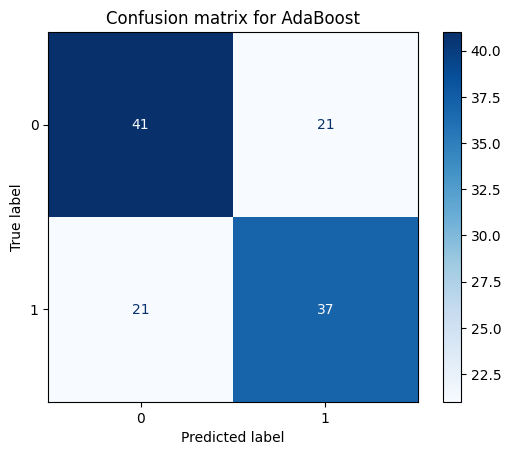

----------------------------------------------------------------------------------------------------


Classifier: Naive Bayes
              precision    recall  f1-score   support

           0       0.66      0.76      0.71        62
           1       0.69      0.59      0.64        58

    accuracy                           0.68       120
   macro avg       0.68      0.67      0.67       120
weighted avg       0.68      0.68      0.67       120



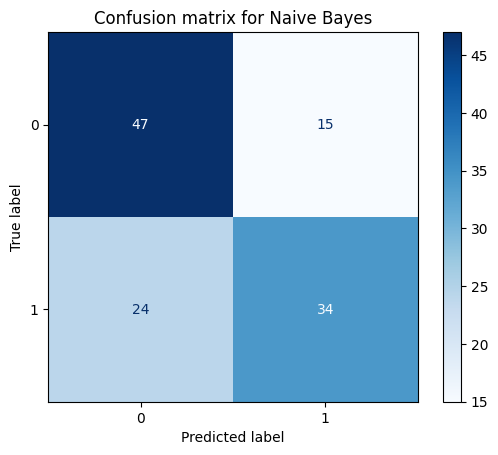

----------------------------------------------------------------------------------------------------


Classifier: QDA
              precision    recall  f1-score   support

           0       0.67      0.77      0.72        62
           1       0.71      0.59      0.64        58

    accuracy                           0.68       120
   macro avg       0.69      0.68      0.68       120
weighted avg       0.69      0.68      0.68       120



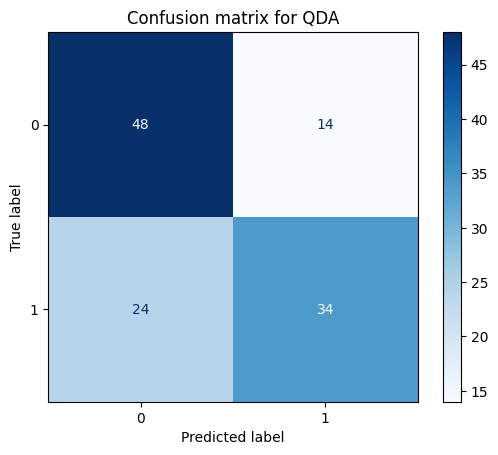

----------------------------------------------------------------------------------------------------


Classifier: XGBoost
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        62
           1       0.63      0.71      0.67        58

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.66      0.66       120



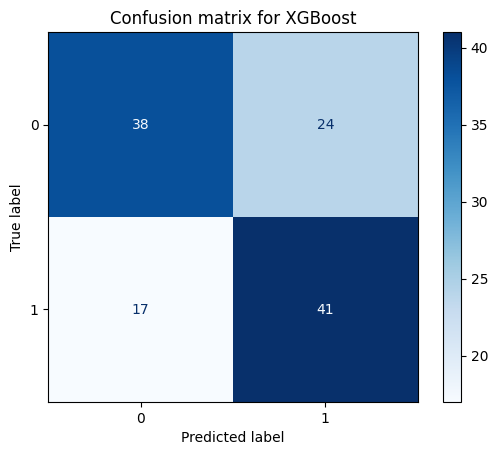

----------------------------------------------------------------------------------------------------


Classifier: LightGBM
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        62
           1       0.70      0.66      0.68        58

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120



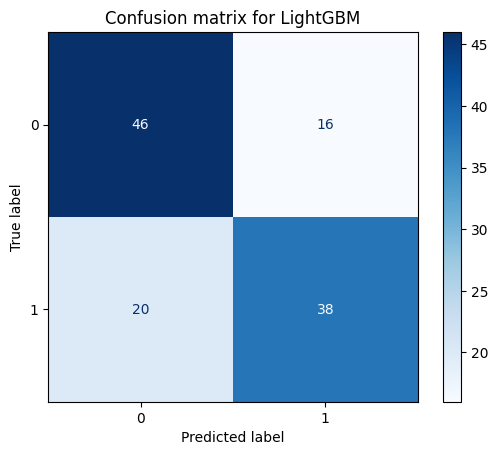

----------------------------------------------------------------------------------------------------




In [6]:
# Print performance metrics for all classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)   # Fit classifier to training data
    y_pred = clf.predict(X_test)   # Predict labels using trained classifier

    # Print classification report
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)   # Compute confusion matrix
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=np.unique(y))   # Display confusion matrix
    disp.plot(cmap=plt.cm.Blues)   # Plot confusion matrix
    # Set title for confusion matrix plot
    plt.title(f"Confusion matrix for {name}")
    plt.show()   # Display the plot
    print("-"*100+"\n\n")